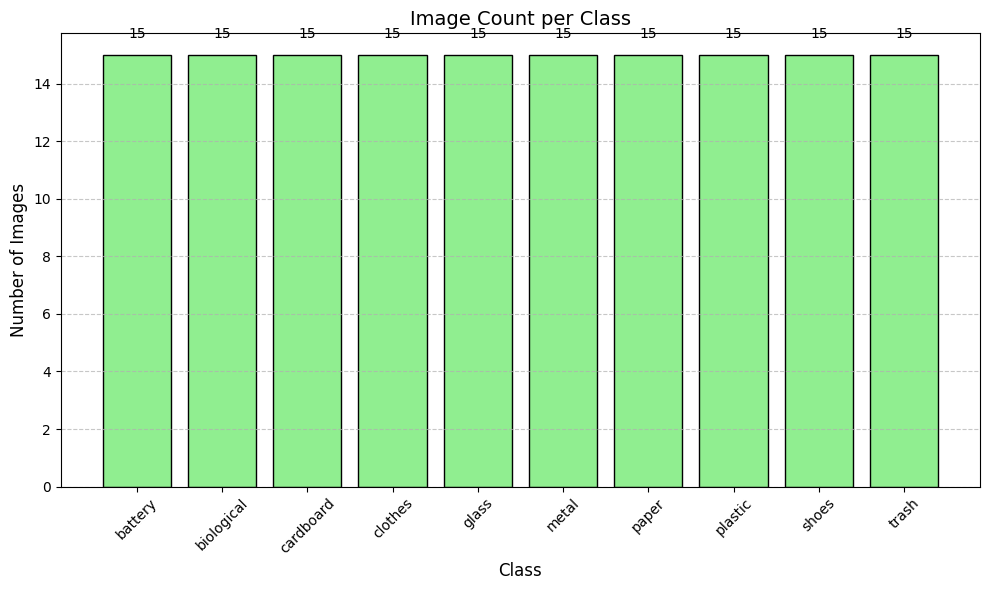

In [9]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from PIL import Image

# Path to dataset
dataset_path = "garbage-dataset"

# Count images per class
class_counts = {}
for class_dir in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_dir)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        class_counts[class_dir] = len(image_files)

# Convert to DataFrame and sort
df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Class").reset_index(drop=True)

# Bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df["Class"], df["Image Count"], color='lightgreen', edgecolor='black')
plt.title('Image Count per Class', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()


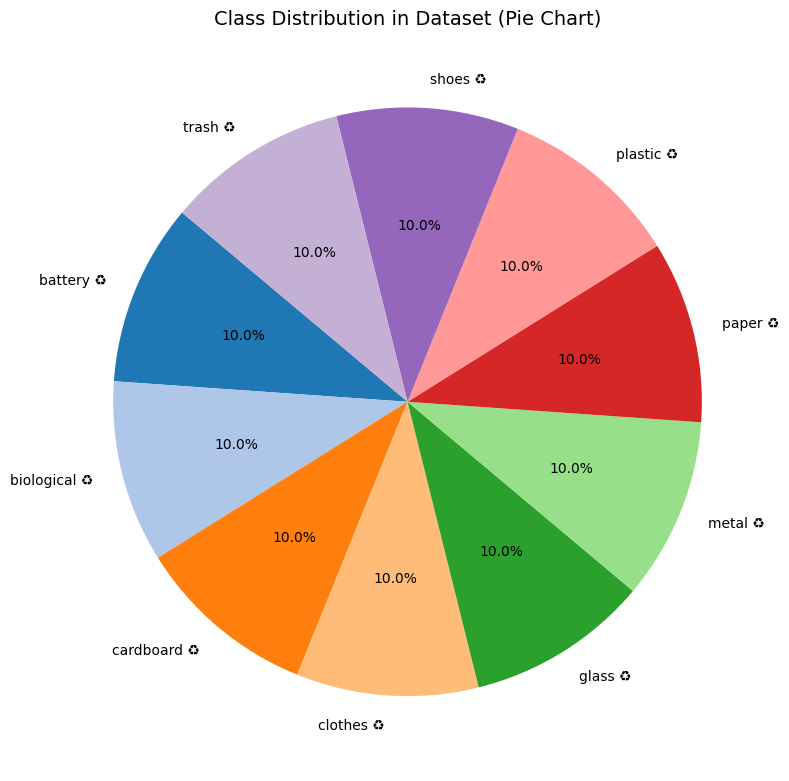

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(
    df["Image Count"],
    labels=[f"{label} ♻️" for label in df["Class"]],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Class Distribution in Dataset (Pie Chart)', fontsize=14)
plt.axis('equal')  # Makes sure pie is a circle
plt.tight_layout()
plt.show()

✅ Model loaded successfully.
1/1 [==============================] - 0s 52ms/step


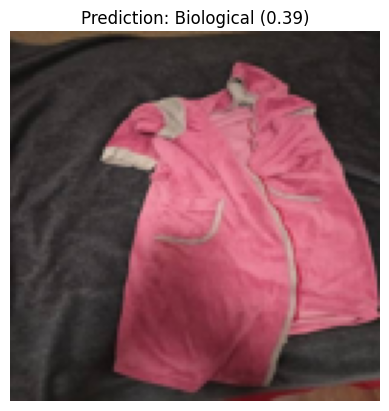

In [16]:
# Provide the path to an image
CLASS_NAMES = ['Battery', 'Biological', 'Cardboard', 'Clothes', 'Glass', 'Metal', 'Paper', 'Plastic', 'Shoes', 'Trash']

model = tf.keras.models.load_model("garbage_classifier.h5")
print("✅ Model loaded successfully.")

def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image.resize((128, 128))
    img_array = np.array(image) / 255.0
    return np.expand_dims(img_array, axis=0), image


img_path = "garbage-dataset/clothes/clothes_1.jpg"

processed_img, display_img = preprocess_image(img_path)
prediction = model.predict(processed_img)[0]

predicted_class = CLASS_NAMES[np.argmax(prediction)]
confidence = np.max(prediction)

# Display the image and prediction
plt.imshow(display_img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class} ({confidence:.2f})")
plt.show()
    

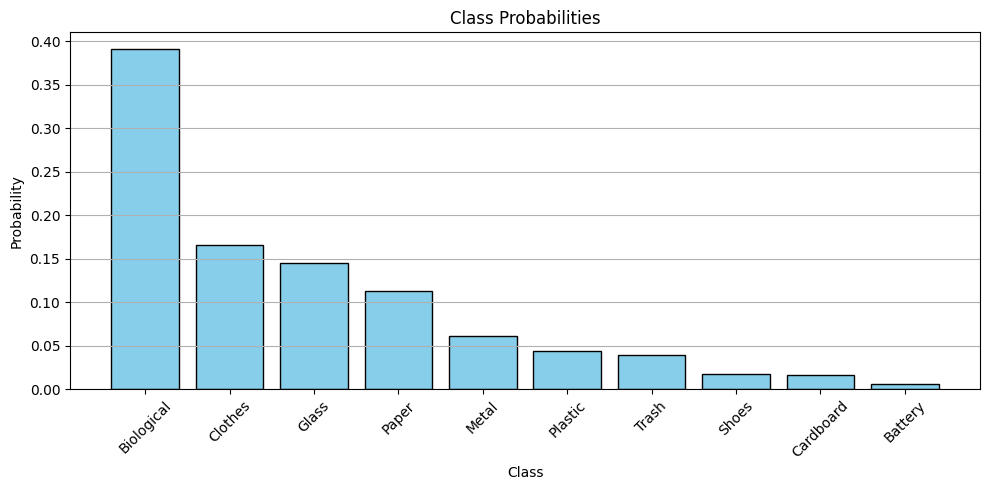

In [17]:
# Create DataFrame for better readability
df_probs = pd.DataFrame({
    "Class": CLASS_NAMES,
    "Probability": prediction
}).sort_values(by="Probability", ascending=False)

# Bar chart
plt.figure(figsize=(10, 5))
plt.bar(df_probs["Class"], df_probs["Probability"], color='skyblue', edgecolor='black')
plt.title("Class Probabilities")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
